# Pullback attractors

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The following is a non-autonomous ode.

$\frac{dx}{dt}= f(x,t)$

The following function constructs $f(x) = -\lambda(x+vt)$ where v=1, $\lambda =1$

In [3]:
def nauto(x,t):
    return -(x+t)

Now, a function to plot its forwards evolution for various initial conditions

In [4]:
def plot_steps(v,xspace,r,dt=0.005, limy = []):
    for x_0 in xspace:
        t=zeros(r)
        x=np.zeros(r+1)
        x[0]= x_0
        for i in range(r):
            t[i]=i*dt
            x[i+1]=x[i]+dt*v(x[i],t[i])
        plot(t,x[:-1])
        if limy != []:
            ylim(limy)
    xlabel('t')
    ylabel('x(t)')
    title('forward attractor')

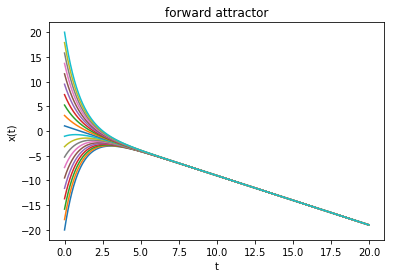

In [5]:
xspace= linspace(-20,20,20)
plot_steps(nauto,xspace,2000,dt=0.01)

A pullback attractor sees the evolution of the systems from $-\infty$ to the current time. Since we can't put in $-\infty$ , we try a few negative initial times and estimate the structure.

In [5]:
def plot_pull(v,tspace,xspace,r,dt=0.005, limy = []):
    for x_0 in xspace:
        for t0 in tspace:
            t=zeros(r)
            x=np.zeros(r+1)
            x[0]= x_0
            for i in range(r):
                t[i]=i*dt +t0
                x[i+1]=x[i]+dt*v(x[i],t[i])
            plot(t,x[:-1])
            if limy != []:
                ylim(limy)
    xlabel('t')
    ylabel('x(t)')
    title('Pullback attractor')

We take $x_0 =1$ for all time steps

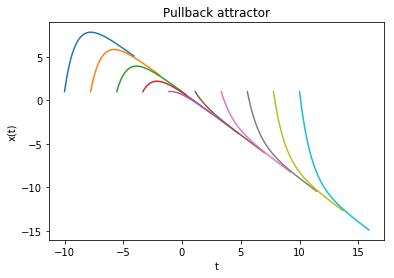

In [6]:
tspace= linspace(-10,10,10)
plot_pull(nauto,tspace,[1],60,dt=0.1)
#plot_steps(nauto,[1],2000,dt=0.1)

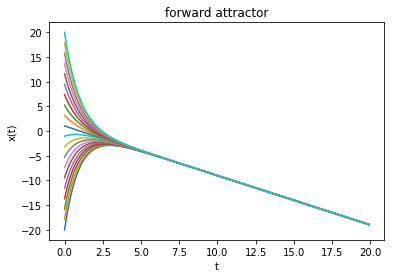

In [7]:
xspace= linspace(-20,20,20)
plot_steps(nauto,xspace,200,dt=0.1)

#### Hidden catastrophe

Non-autonomous bifurcations for $f(x,t) = x(1-x^2) +t $

Since the pullback attractor is a smooth function connecting the root at $-\infty$  to $\infty$, it doesn't jump abruptly. 

Below is the pullback attractor of $x_0 =-3$

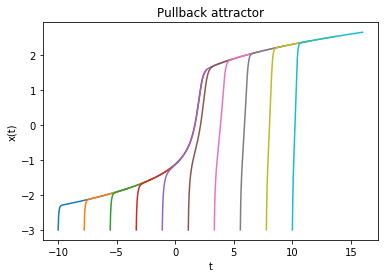

In [8]:
def hidden(x,t):
    return x*(1-x**2)+t
tspace= linspace(-10,10,10)
plot_pull(hidden,tspace,[-3],600,dt=0.01)

When $x_0 =3$

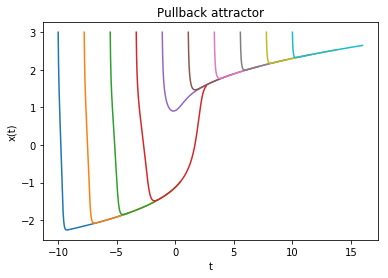

In [9]:
plot_pull(hidden,tspace,[3],600,dt=0.01)

The forward attractor starting at t=0

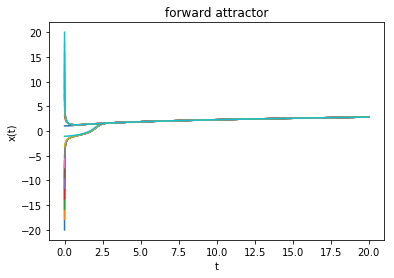

In [10]:
xspace= linspace(-20,20,20)
plot_steps(hidden,xspace,20000,dt=0.001)

#### Non-autonomous saddle-node bifurcation

$f(x,t)= -x^2 + \alpha(1-t)$

In [12]:
def nauto2(x,t,alpha=4):
    return -x**2 + alpha*(1-t)

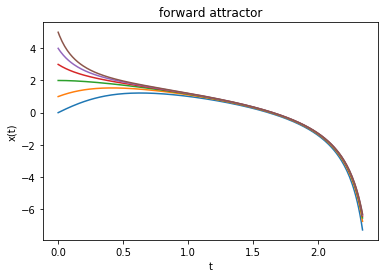

In [29]:
xspace= linspace(0,5,6)
plot_steps(nauto2,xspace,235,dt=0.01)

Although the stable fixed point disappears at t=1, the point of no return is still farther away (2.47)

In [39]:
def plot_noreturn(v,xspace,r,dt=0.005, limy = []):
    for x_0 in xspace:
        if abs(x_0-2) <=0.5:
            alpha =4
        elif abs(x_0-4) <=0.5:
            alpha =16
        elif abs(x_0-6) <=0.5:
            alpha =36
        else:
            alpha =4
        t=zeros(r)
        x=np.zeros(r+1)
        x[0]= x_0
        for i in range(r):
            t[i]=i*dt
            x[i+1]=x[i]+dt*v(x[i],t[i],alpha)
        plot(t,x[:-1])
        if limy != []:
            ylim(limy)
    xlabel('t')
    ylabel('x(t)')
    title('The point of no return increases with increasing alpha')

/home/jithin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


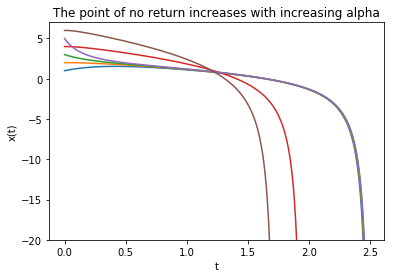

In [53]:
xspace= linspace(1,6,6)
plot_noreturn(nauto2,xspace,250,dt=0.01, limy=[-20,7])